In [ ]:
# going to hand roll this one correctly using torch

In [2]:
import torch

In [187]:
# bring in mnist (copy pasted from other notebook so it uses tf but I want it to be an exact copy of what I did before)
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
print("done")

done


/var/folders/jl/kw6cvq_16z5_1frv1b3stcj80000gn/T/ipykernel_99140/1729236706.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(image)


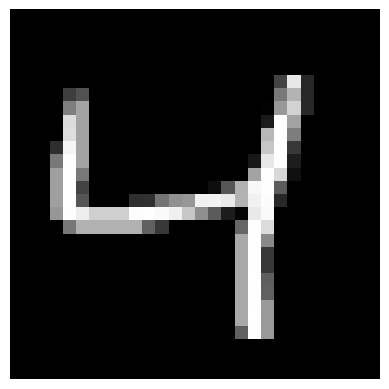

In [188]:
# helper function to visualize an example
import matplotlib.pyplot as plt
import numpy as np

def show_mnist_example(image, pred_label=None, true_label=None):
    img = np.array(image)
    # Set up label text
    title = ""
    if true_label is not None:
        title += f"True: {true_label}  "
    if pred_label is not None:
        title += f"Pred: {pred_label}"

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=12)
    plt.show()

show_mnist_example(x_train[2])

In [189]:
# rewrite MLP class in torch
## create the neuron, layer and MLP
import random

class Fully_Connected_Layer():
    def __init__(self, nin, nout, nonlinearity):
        self.w = torch.randn(nin, nout, requires_grad=True)
        self.b = torch.randn(nout, requires_grad=True)
        self.nonlinearity = nonlinearity

    def __call__(self, x):
        act = (x @ self.w) + self.b
        if(self.nonlinearity):
            return torch.relu(act)
        return act

    def parameters(self):
        return [self.w, self.b]

class MLP():
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Fully_Connected_Layer(sz[i], sz[i+1], True) for i in range(len(nouts)- 1)]
        self.layers.append(Fully_Connected_Layer(sz[-2], sz[-1], False))

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

            

In [190]:
def loss_individual(model_outputs, target_label_index):
    max_logit = torch.max(model_outputs)
    shifted_logits = model_outputs - max_logit
    exp = torch.exp(shifted_logits)
    sum_exp = torch.sum(exp)
    target_exp = exp[target_label_index]
    softmax_target = target_exp / sum_exp

    # negative log liklihood
    eps = 1e-12
    loss = -torch.log(softmax_target + eps)
    return loss
    

In [219]:
import random

lossi = []
mnist_mlp = MLP(28*28, [128, 10])
learning_rate = 0.0009
epochs = 1
examples_per_epoch = 50000

print_reset_error_interval = 250
cumulative_error = 0

for epoch in range(epochs):
    for i in range(examples_per_epoch):
        flattened = torch.flatten(x_train[i])
        out = mnist_mlp(flattened)
        loss = loss_individual(out, y_train[i].item())
        cumulative_error += loss.item()
        loss.backward()
        for param in mnist_mlp.parameters():
            param.data -= learning_rate * param.grad
            param.grad.zero_()

        if(i % print_reset_error_interval == 0 and i != 0):
            lossi.append(cumulative_error / print_reset_error_interval)
            cumulative_error = 0
print("done")

done


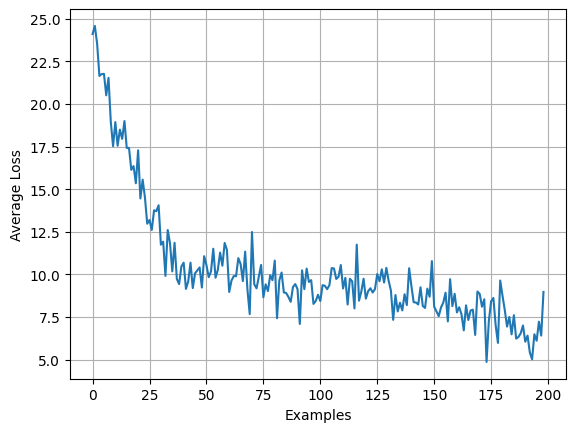

In [220]:
import matplotlib.pyplot as plt

plt.plot(lossi)
plt.xlabel('Examples')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

tensor([ 58.4175, -19.4811,  53.9037,  66.7910, -84.5345, -64.3261, -12.6067,
        -12.7423,   8.9012, -17.6569], grad_fn=<AddBackward0>)


/var/folders/jl/kw6cvq_16z5_1frv1b3stcj80000gn/T/ipykernel_99140/1729236706.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(image)


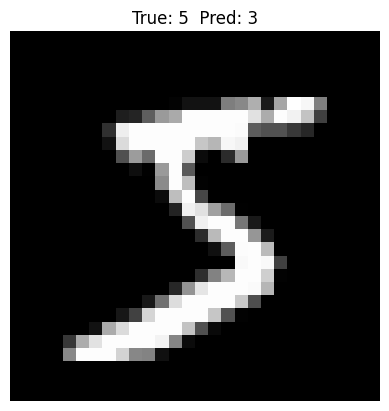

tensor([ 149.6834,  -46.5732,   46.8771,  -10.3421, -172.6453,  -48.3700,
         -56.4141,  -26.4557,  -31.8278,  -43.4987], grad_fn=<AddBackward0>)


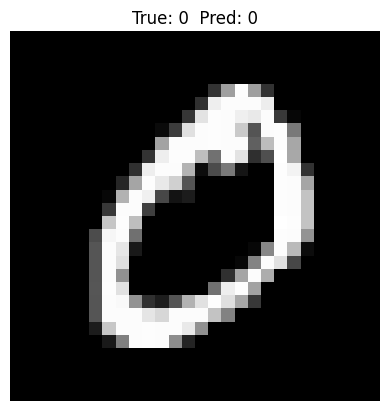

tensor([   2.9139,  -44.0019,  -23.9454,  -22.8288,   88.5412, -142.6929,
         -40.1034,    6.6886,  -26.3224,  -38.6578], grad_fn=<AddBackward0>)


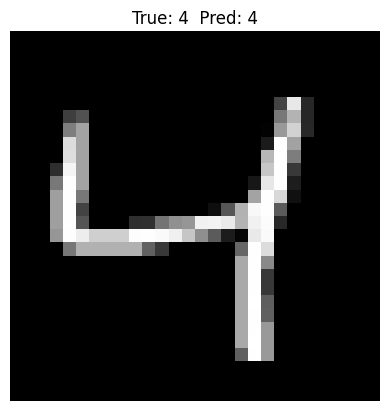

tensor([-47.8707, 129.2137,  28.3182, -48.5790, -35.6008,  34.9684, -47.5267,
        -16.0560,  73.0860, -15.1600], grad_fn=<AddBackward0>)


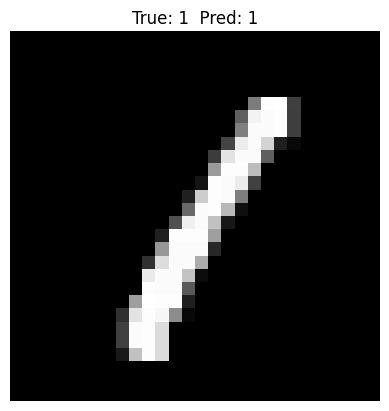

tensor([ -6.1215,   4.3544,  10.7268,  -4.6185, 125.5538,  80.9812, -26.9177,
        138.4405,  90.1338, -35.2951], grad_fn=<AddBackward0>)


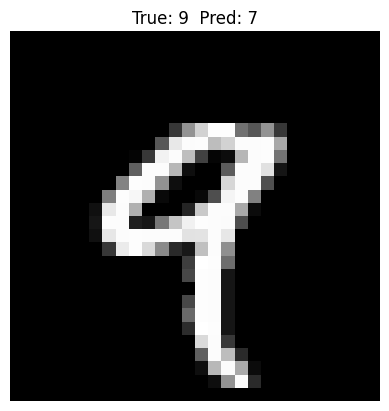

tensor([ 68.3383, -84.4268, 195.9924,  49.6278, -17.7289, -52.0600,  26.0087,
         68.1511,  63.2161, -68.9779], grad_fn=<AddBackward0>)


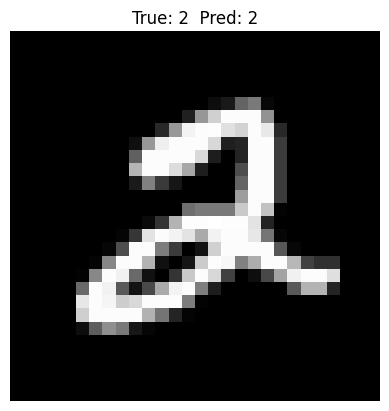

tensor([-75.1127, 128.1909,  90.0144,  52.6963, -62.0843,  34.9767, -46.2262,
        -56.7833,  37.8932,  -4.2387], grad_fn=<AddBackward0>)


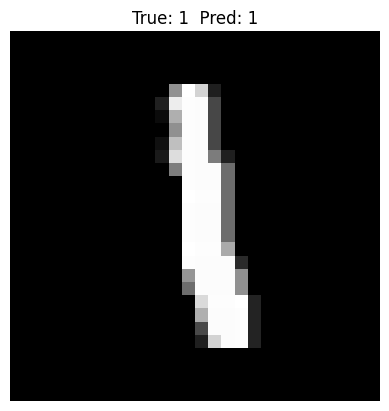

tensor([  41.3300,  -52.1007,   48.0231,  175.6304,    1.3568, -119.0597,
         -93.9944,  -28.0093,  133.7503,  -72.1268], grad_fn=<AddBackward0>)


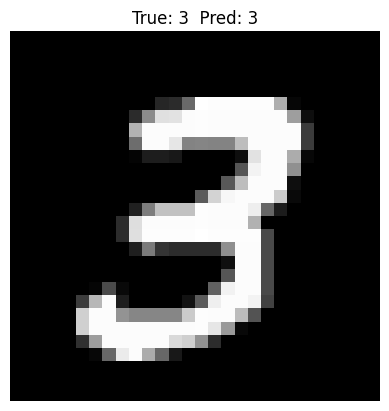

tensor([-31.3114, 102.1113,  65.4392,  34.7067, -33.3791,  -2.4978,  -9.1215,
        -10.2661,   7.1914,  -4.5847], grad_fn=<AddBackward0>)


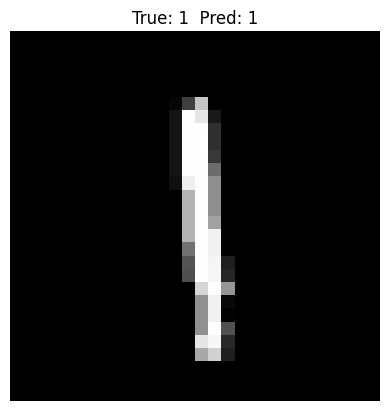

tensor([ -67.5445, -111.1173,  -10.4031, -123.3477,  120.1568,   73.4492,
          43.0743,   -5.4418,  -20.3192,  -73.8254], grad_fn=<AddBackward0>)


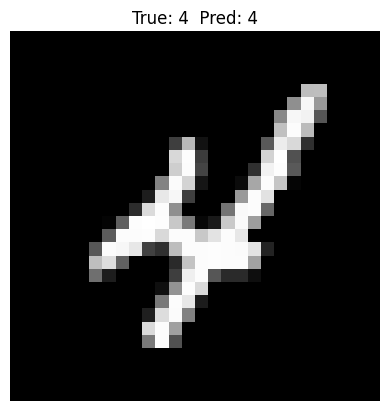

tensor([ -13.8500,  -30.7835,   27.3140,  146.5386,  -39.8927,  -27.7433,
        -104.6111,  -41.1070,   48.0568, -117.2301], grad_fn=<AddBackward0>)


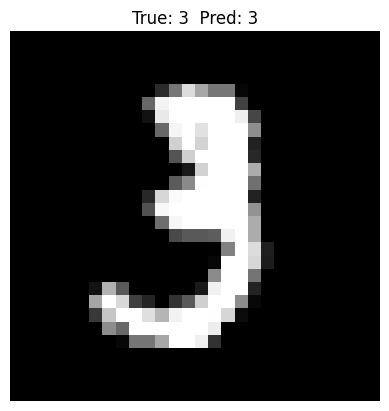

tensor([-52.0542,  36.5471,  37.6727, -50.8050, -55.4313,  90.4633, -55.4299,
        -59.7983,  56.2862, -57.2584], grad_fn=<AddBackward0>)


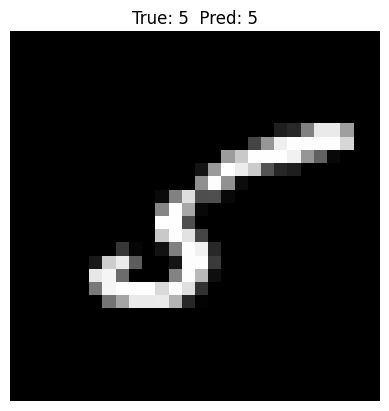

tensor([ -50.8536,  -63.0545,   19.8007,  272.3362, -105.6080, -166.1164,
        -151.2166,  -15.3359,   37.7528,  -69.3430], grad_fn=<AddBackward0>)


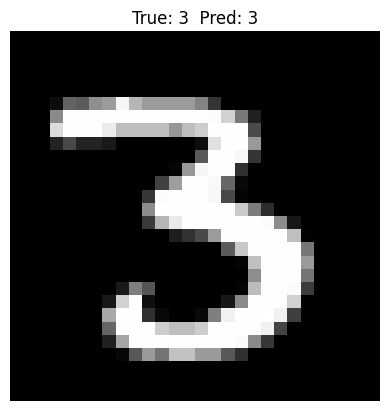

tensor([ -47.0441,  -52.2562,   87.4090, -100.6724,   75.0126,   47.5589,
         235.1405,  -44.2703,   44.5291,  -28.7558], grad_fn=<AddBackward0>)


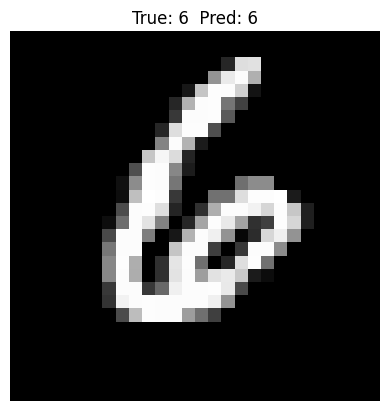

tensor([-58.1129, 123.8978,  67.8504,  34.4357, -57.4075,  39.0248,  -4.4894,
         -8.7489,  53.6408, -10.4369], grad_fn=<AddBackward0>)


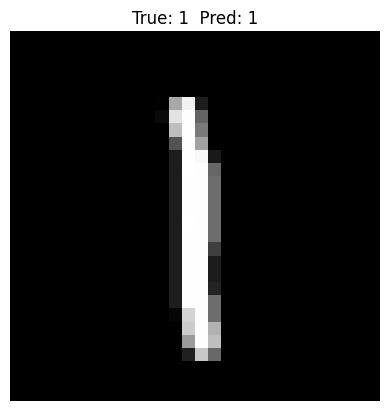

tensor([ 25.9439,   7.4098, -51.4633, -91.4912,  34.0575,  79.0462, -73.3178,
        208.8412,  54.7804, -36.1278], grad_fn=<AddBackward0>)


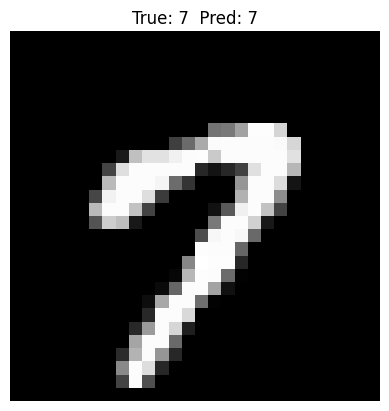

tensor([ -30.0625, -102.2867,  136.1048,   45.6265,  -74.9955,  -82.2440,
         -68.2183,  -48.5993,  -24.3979,  -26.6882], grad_fn=<AddBackward0>)


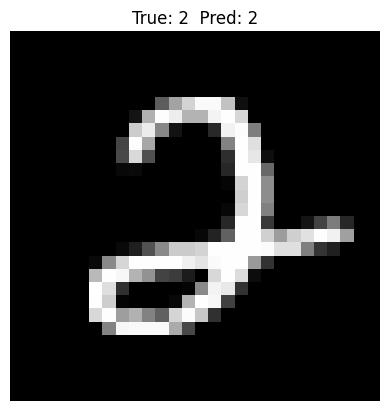

tensor([ -41.7576,   94.0462,   21.9956,  -39.9785,  -30.1834,  110.6577,
         -93.4242,   44.7578,  144.7328, -102.4490], grad_fn=<AddBackward0>)


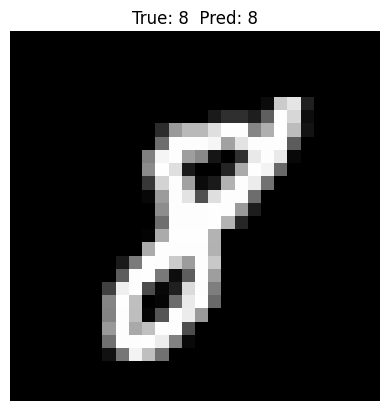

tensor([ 11.2647,  -5.1828,  28.1177, -18.3468,  55.1127, -45.3190,  91.9678,
        -30.1351,  64.3973, -19.1572], grad_fn=<AddBackward0>)


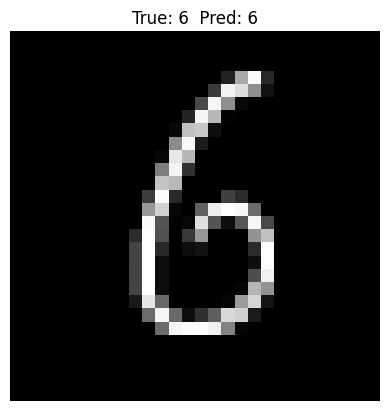

tensor([-27.0376,  39.8682, -29.5767, -50.0898,  48.6423,  87.8688, -82.2350,
         77.5254,  88.6414, -52.0344], grad_fn=<AddBackward0>)


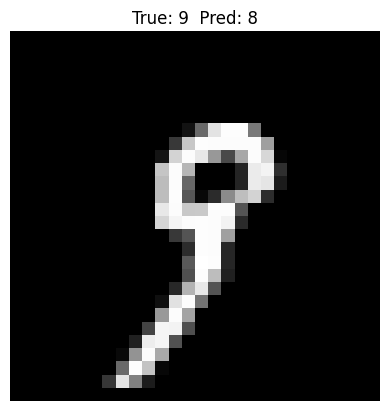

In [222]:
# test it on 10 examples
test_number = 20
# helper function to visualize an example
import matplotlib.pyplot as plt
import numpy as np

def pick_label(out):
    largest = 0
    index = 0
    for i in range(len(out)):
        if(out[i].data > largest):
            largest = out[i].data
            index = i
    return index
        
for i in range(test_number):
    forward_label = mnist_mlp(torch.flatten(x_train[i]))
    print(forward_label)
    show_mnist_example(x_train[i], pred_label=pick_label(forward_label), true_label=y_train[i])
    

In [221]:
correct_predictions = 0
total_examples = len(x_train)

for i in range(total_examples):
    flattened = torch.flatten(x_train[i])
    out = mnist_mlp(flattened)

    predicted_class = torch.argmax(out).item()

    true_label = y_train[i].item()

    if predicted_class == true_label:
        correct_predictions += 1

accuracy_percentage = (correct_predictions / total_examples) * 100
print(f"Accuracy on entire train set: {accuracy_percentage:.2f}%")

Accuracy on entire train set: 72.41%


In [ ]:
# write cnn class in torch and train mnist
# so it's interesting in the same way that x @ w is quite efficient there's also a way to efficiently do a convolutional calculation called
# im2col so I'm going to understand that first from a high level and then use that implementation for mine

Notes on im2col from https://www.youtube.com/watch?v=-Y4ST8eNySI

There are two ways to implement convolutions, direct convolutions and transformation based convolutions. Direct convolutions are the typical sliding window that we know. Transformation based convolutions (winograd / fft).

Winograd are based on the idea that the dot products that we perform contain repeated work (which they do) and we can save by saving things / diffing things.

The other way is the fast fourier transform method where you do some fancy stuff that I don't understand. Pytorch is much faster compared to numpy but uses much more memory.

There are two tricks which greatly speed up the convolutional layer. We're trading off memory for speed (a trade I'm pretty much always okay with making).

It works by unrolling the windows of the kernal and the input patches into a large matrix.

<div>
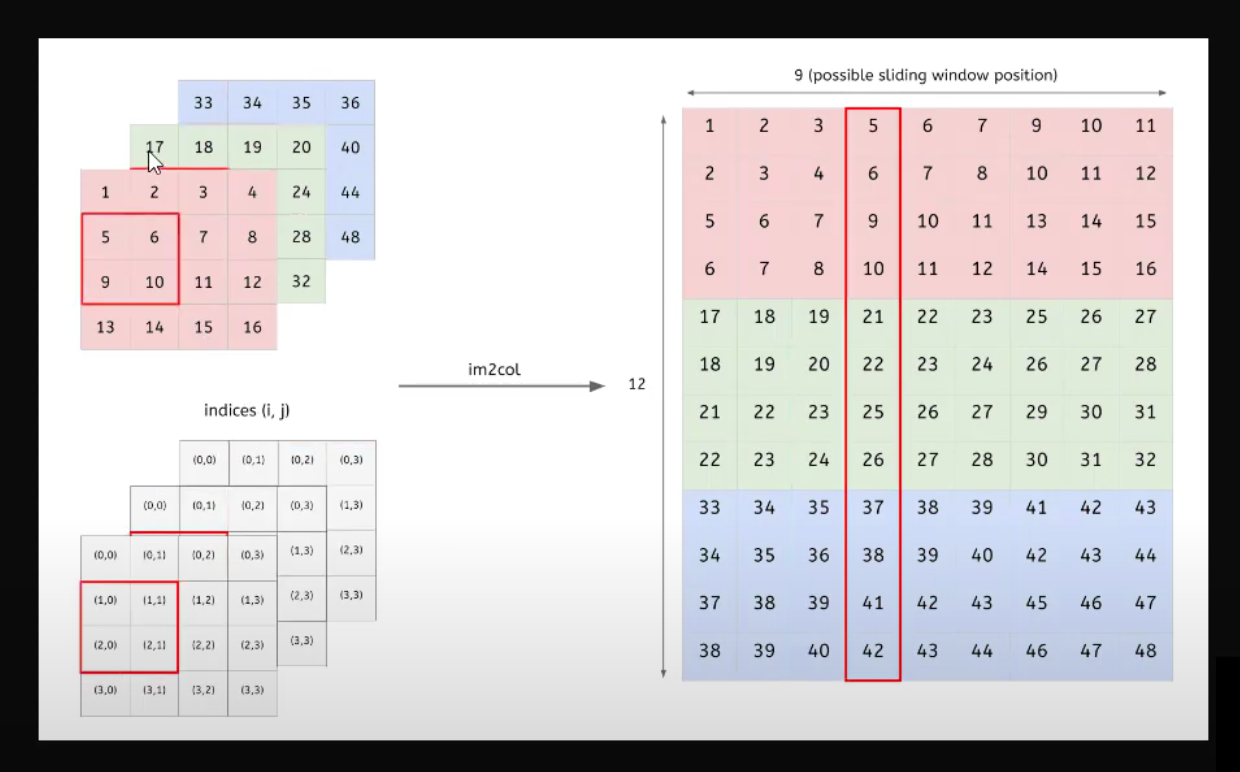
</div>

So each of these patches becomes a column. We also do the same thing with the kernel, but we turn it into rows. Then we can do one big matrix multiplication in one step, as opposed to all the dot products that you have.

That's the first trick. 

How does it actually work though?

We could of course do a double for loop and append all the rows flattened into a matrix and then matrix multiply the kernel with that, but that still requires a double for loop and is hardly faster.

<div>
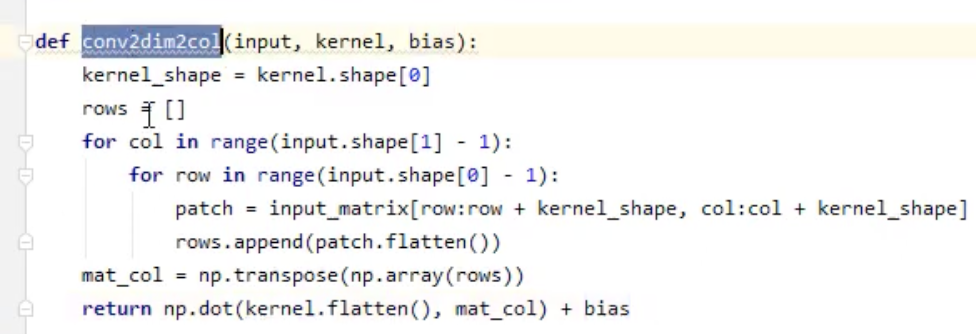
</div>

So what is actually more efficient is by looking at how the matrix's are stored in memory, and cleverly setting the stride of the tensor to be a value that gives us these rows without us needing to actualy loop through them and copy them one by one.

First of all though we need to quickly understand what stride is in a numpy array / torch tensor. Essentially the arrays are stored in contiguous memory locations. The stride tells us how many bytes we have to jump in order to get to the start of the next element in the array. This can work for all dimensions. So in a 1d array it would obviously just go to the next element, but in a 2d array, the stride would tell us how many bytes we have to jump to get to the next row in the 2d array.

So for example if each element is 4 bytes wide, then the stride would be 4. If we have 3 elements in each row, then to get to the next row we'd have to jump 3 * 4 = 12 bytes / memory locations.

We have the ability to change these strides, which changes the view of the matrix without changing the data. We notice in the above image when we unroll the convolutions we kind of have this pattern where each row is the previous row but offset by 1. So if review the matrix and set the shape with this example starting with a 3x3 matrix, to be of shape 6x3 with stride 4,4 then we get the unrolled matrix as desired. This makes sense as setting the stride to 4,4 means that between elements we jump 4, and between rows we jump 4.

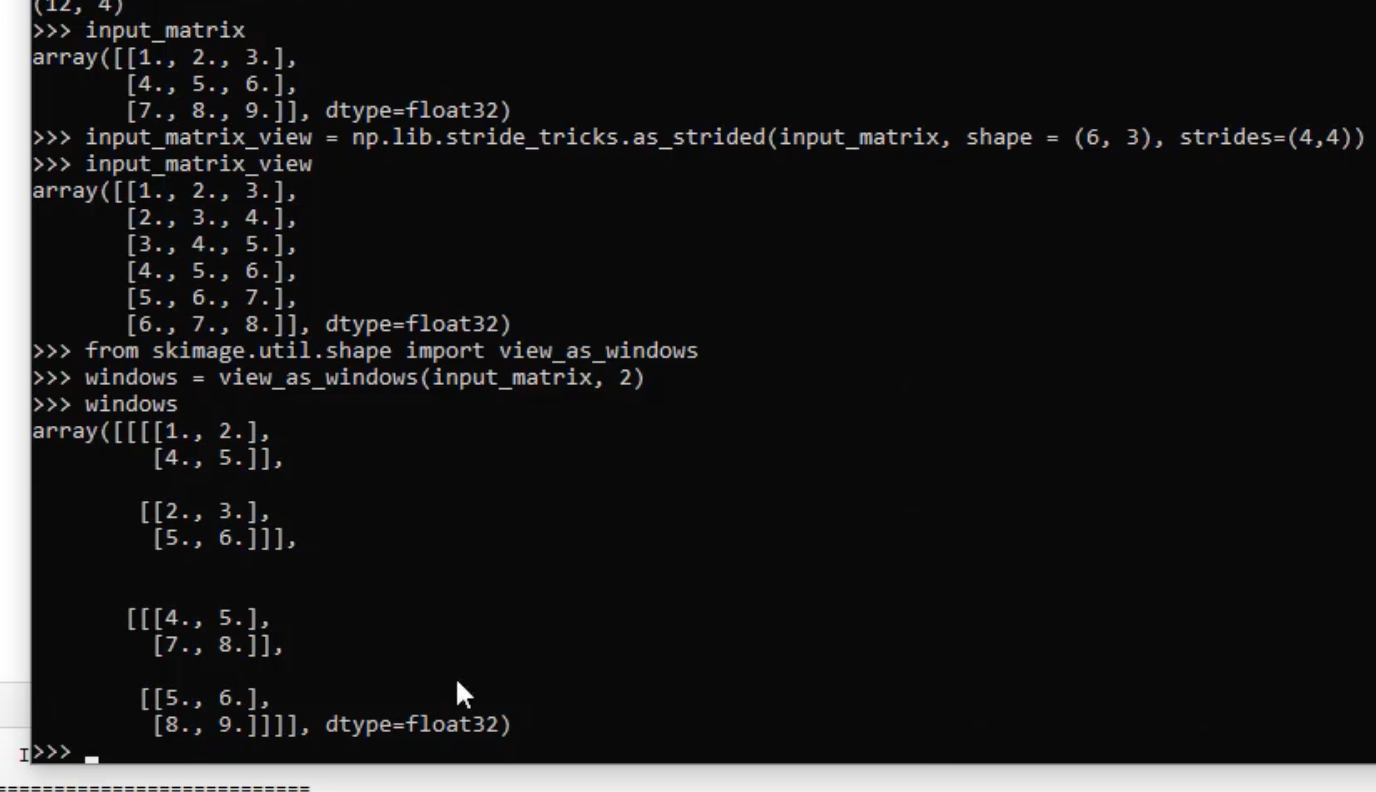

By doing this we get the same pattern without doing the nasty loops. So this is how we efficiently turn it into a single matrix multiply. So now let's go implement this! Note that this code uses the sklearn view as windows function.

In [381]:
# implementing convolutional layer with im2col and stride trick in pytorch
# correctly this time where each unit has a depth dimension that is linked to all the previous units in the layer
import torch.nn.functional as F


class Convolutional_Unit():
    def __init__(self, channels, kernel_height, kernel_width, **kwargs):
        self.kernel_width = kernel_width
        self.kernel_height = kernel_height
        self.channels = channels
        self.kernel = torch.randn((channels, kernel_height, kernel_width), requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
       
    def __call__(self, input_tensor):
        
        in_channels, input_height, input_width = input_tensor.shape
        kh, kw = self.kernel_height, self.kernel_width
        out_height = input_height - kh + 1
        out_width = input_width - kw + 1
        
        stride_c, stride_y, stride_x = input_tensor.stride()
        
        # Create a strided view for sliding windows
        window_shape = (in_channels, out_height, out_width, kh, kw)
        window_strides = (stride_c, stride_y, stride_x, stride_y, stride_x)
        windows = input_tensor.as_strided(size=window_shape, stride=window_strides)
        
        # Flatten each window patch to shape (out_height * out_width, in_channels * kh * kw)
        patches = windows.contiguous() \
            .view(in_channels, out_height * out_width, kh * kw) \
            .permute(1, 0, 2) \
            .reshape(out_height * out_width, -1)
        
        # Flatten kernel to shape (in_channels * kh * kw,)
        kernel_flat = self.kernel.view(-1)
        
        # Matrix multiply patches with kernel
        output = patches @ kernel_flat  # shape: (out_height * out_width,)
        output = F.relu(output + self.b)
        
        return output.view(out_height, out_width)
        
    def parameters(self):
        return [self.kernel, self.b]


class AvgPool2D:
    def __init__(self, kernel_height, kernel_width):
        self.kernel_height = kernel_height
        self.kernel_width  = kernel_width

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        if x.ndim == 2:
            x = x.unsqueeze(0)

        c, H, W = x.shape
        kh, kw = self.kernel_height, self.kernel_width
        out_H = H // kh
        out_W = W // kw

        sc, sy, sx = x.stride()

        window_shape   = (c, out_H, out_W, kh, kw)
        window_strides = (sc, sy * kh, sx * kw, sy, sx)

        windows = x.as_strided(size=window_shape, stride=window_strides)
        return windows.mean(dim=(-1, -2))

    def parameters(self):
        return []

        
class Convolutional_Feature_Map():
    def __init__(self, num_units, in_channels, kernel_height, kernel_width):
        self.convolutional_units = [Convolutional_Unit(in_channels, kernel_height, kernel_width) for _ in range(num_units)]
        self.num_units = num_units
    def __call__(self, x):
        # if x doesn't have a channel dimension then we should add one
        if len(x.shape) == 2:
            x = x.view(1, x.shape[0], x.shape[1])

        feature_maps = [unit(x) for unit in self.convolutional_units]
        
        return torch.stack(feature_maps, dim=0)
        
    def parameters(self):
        return [p for layer in self.convolutional_units for p in layer.parameters()]

class Flatten:
    def __call__(self, x):
        return x.contiguous().view(-1)

    def parameters(self):
        return []

class LeNet():
    def __init__(self):
        self.layers = [
            # input shape is 28 x 28
            Convolutional_Feature_Map(18, 1, 5, 5),
            AvgPool2D(2, 2),
            Flatten(),
            Fully_Connected_Layer(2592, 10, False),
        ]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
        
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [383]:
import random

lossi = []
lenet = LeNet()
learning_rate = 0.002
epochs = 4
examples_per_epoch = 60000
switch_point = 3
print(len(x_train))

print_reset_error_interval = 1000
cumulative_error = 0

for epoch in range(epochs):
    print("epoch " + str(epoch))
    if(epoch >= switch_point):
        print("reducing lr")
        learning_rate = 0.0004
    for i in range(examples_per_epoch):
        out = lenet(x_train[i])
        loss = loss_individual(out, y_train[i].item())
        cumulative_error += loss.item()
        loss.backward()
        for param in lenet.parameters():
            param.data -= learning_rate * param.grad
            param.grad.zero_()

        if(i % print_reset_error_interval == 0 and i != 0):
            print("loading...")
            print(cumulative_error / print_reset_error_interval)
            lossi.append(cumulative_error / print_reset_error_interval)
            cumulative_error = 0
            
print("done")

60000
epoch 0
loading...
21.02394782111622
loading...
18.87989293071542
loading...
17.533624306365134
loading...
15.351834844311558
loading...
13.801877513390755
loading...
13.179116808847882
loading...
13.358114638017103
loading...
13.109545644034952
loading...
11.621827559174823
loading...
8.858224299911551
loading...
6.442856160245821
loading...
2.559605382049651
loading...
2.2901236956892537
loading...
2.0734669518813025
loading...
2.0993752207795624
loading...
1.7573770486120774
loading...
1.7189383544668673
loading...
1.7045996043204892
loading...
1.502591040706091
loading...
1.5329051265288216
loading...
1.4875261302221587
loading...
1.315128936004512
loading...
1.4786660834006033
loading...
1.2884137077713385
loading...
1.256093762004235
loading...
1.1756033533316785
loading...
1.2732567550684544
loading...
1.1568751963727044
loading...
1.0201959482867642
loading...
1.1847181227840333
loading...
1.0670157625692231
loading...
1.1555448589309727
loading...
1.1276539763553337
load

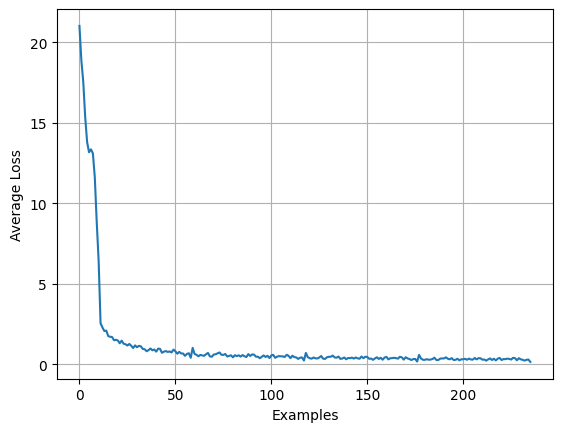

In [385]:
import matplotlib.pyplot as plt

plt.plot(lossi)
plt.xlabel('Examples')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

/var/folders/jl/kw6cvq_16z5_1frv1b3stcj80000gn/T/ipykernel_99140/1729236706.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(image)


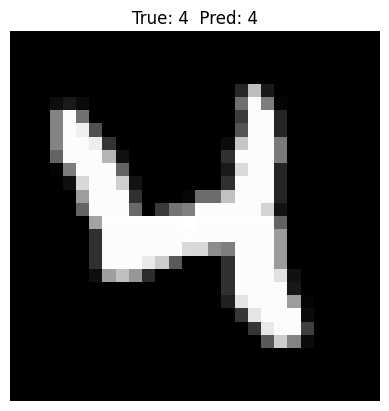

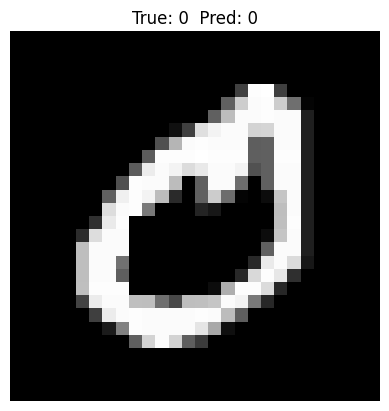

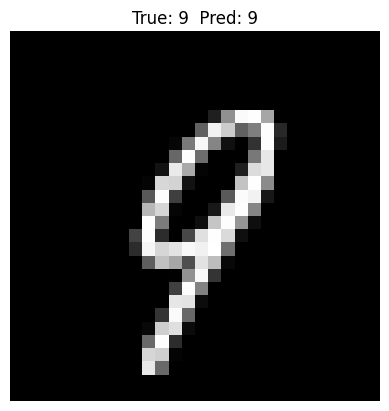

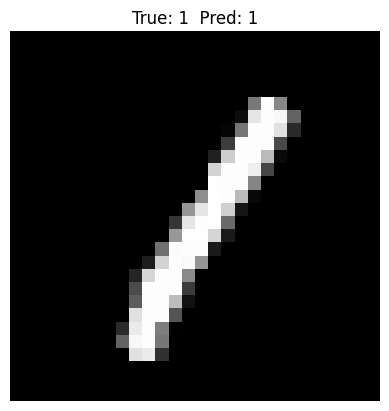

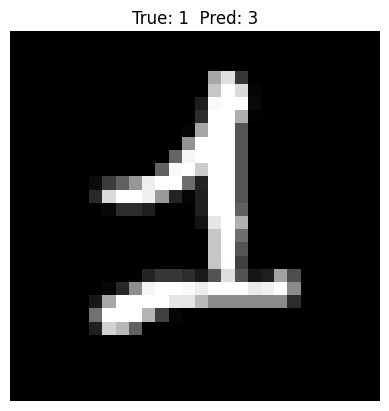

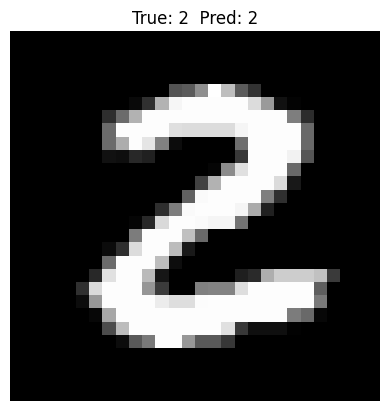

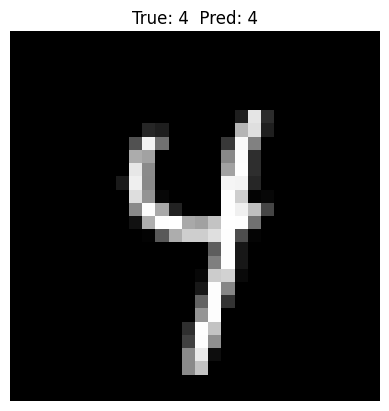

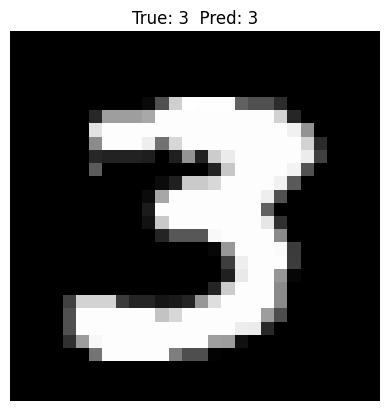

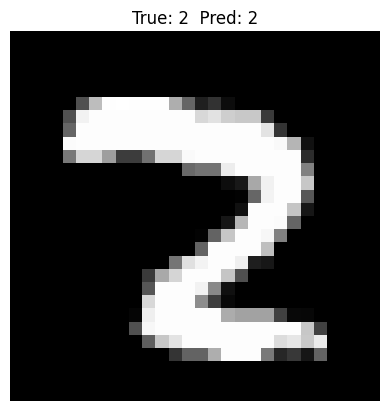

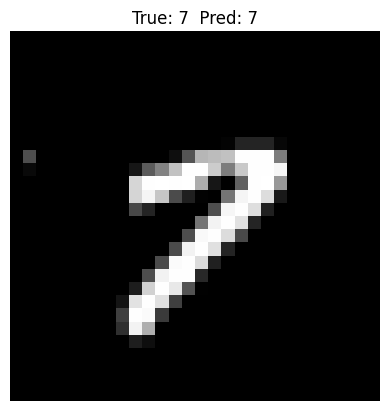

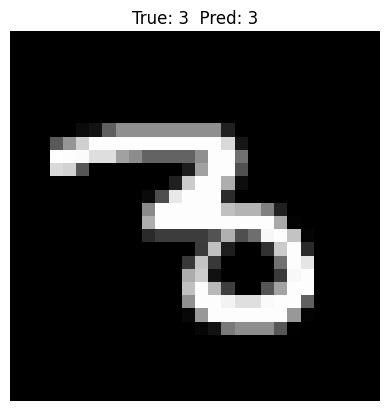

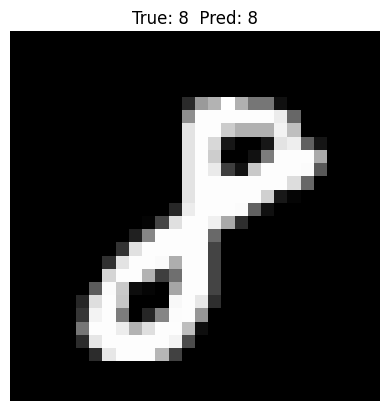

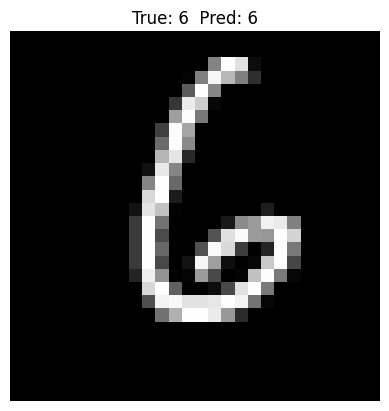

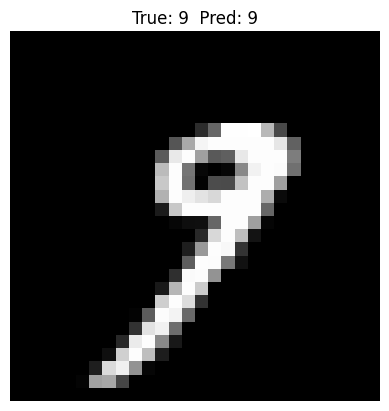

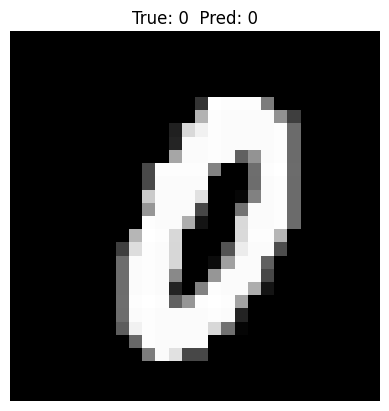

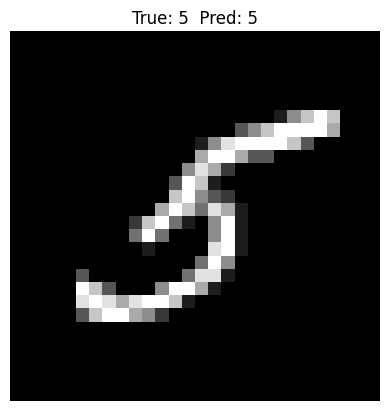

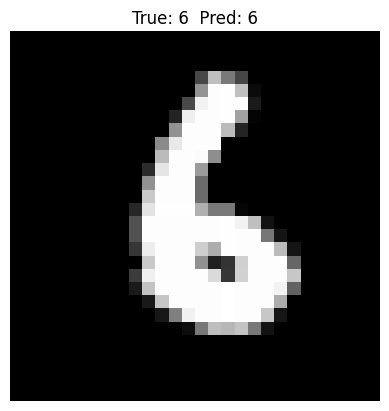

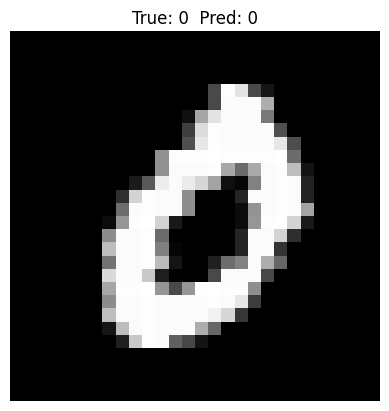

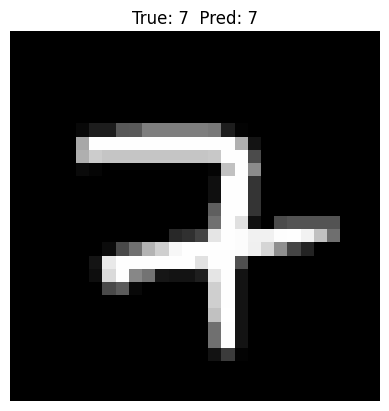

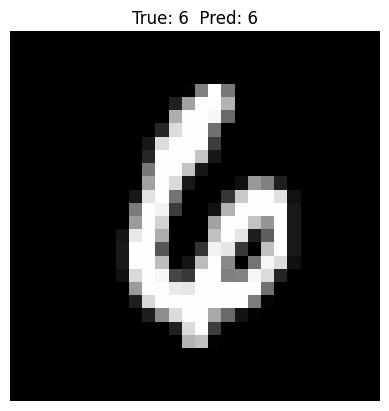

In [388]:
# test it on 10 examples
test_number = 20
# helper function to visualize an example
import matplotlib.pyplot as plt
import numpy as np

def pick_label(out):
    largest = 0
    index = 0
    for i in range(len(out)):
        if(out[i].data > largest):
            largest = out[i].data
            index = i
    return index
        
for i in range(test_number):
    i = i + 20
    forward_label = lenet(x_train[i])
    show_mnist_example(x_train[i], pred_label=pick_label(forward_label), true_label=y_train[i])
    

In [386]:
correct_predictions = 0
total_examples = len(x_train[:5000])

for i in range(total_examples):
    out = lenet(x_train[i])

    predicted_class = torch.argmax(out).item()

    true_label = y_train[i].item()

    if predicted_class == true_label:
        correct_predictions += 1

accuracy_percentage = (correct_predictions / total_examples) * 100
print(f"Accuracy on entire train set: {accuracy_percentage:.2f}%")

Accuracy on entire train set: 91.28%


In [ ]:
# compare the losses and accuracy achieved with them

Awesome, so that worked and has decent accuracy! Not SOTA or as good as the one from YLC, but trained it pretty quickly in a few minutes and it has decent accuracy on the set. I'm happy I brought it to pytorch as my other version would definitely not have learned anything. It struggled to do 30-40 examples and I needed to do 50k+ just to get results. Let's now move on to the different parts of the appendix and try to see if we can find anything useful there.

Appendix A

Their first point would be relevant if I used tanh for my activation function. They talk about how they scale the tanh by increasing it's amplitude as well as by applying a horizontal scaling. This wouldn't be helpful for me as the reason they did this is because they had a bit of a strange loss function where they had an ideal digit.